In [2]:
import pandas as pd

In [3]:
# 여기에 답안코드를 작성하세요
wine = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/winequality_red.csv', encoding='cp949',sep=';')

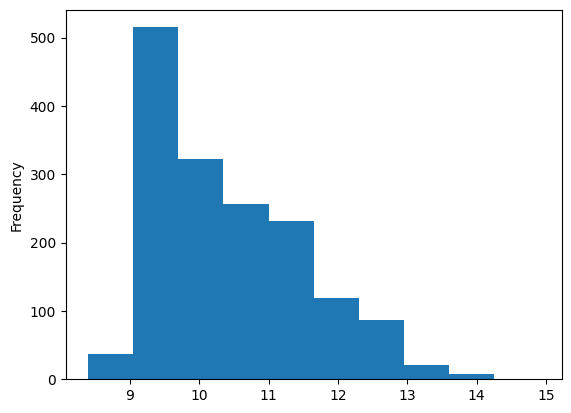

In [5]:
# 히스토그램
import matplotlib.pyplot as plt
wine['alcohol'].plot(kind='hist', bins=10)
plt.show()

In [6]:
# 새로운 컬럼 rat_ca
wine['rat_ca'] = wine['citric acid'] / wine['alcohol']

### **Q7. 데이터 프레임 wine의 컬럼 rat_ac를 x축, quality를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

---

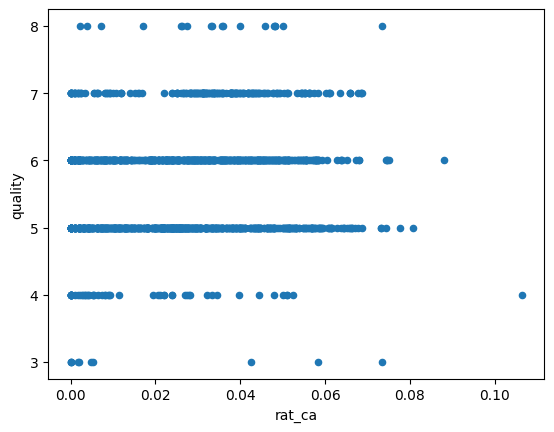

In [7]:
# 산점도
wine.plot(kind='scatter', x='rat_ca', y='quality')
plt.show()

In [8]:
# 새로운 컬럼 rat_r2a

wine['rat_r2a'] = wine['residual sugar']**2 / wine['alcohol']

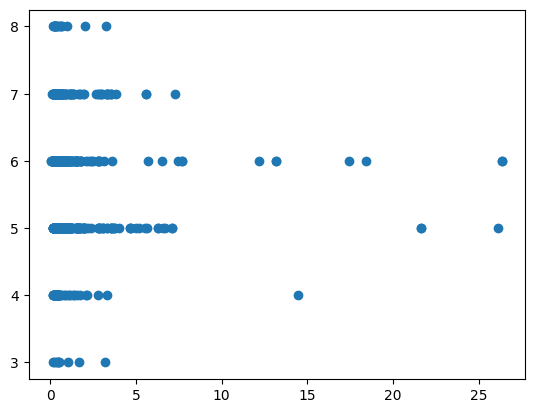

In [9]:
# 산점도
import numpy as np
plt.scatter(x=wine['rat_r2a'], y=wine['quality'])
plt.show()

In [10]:
#  새로운 컬럼 rat_cta
wine['rat_cta'] = wine['citric acid'] / wine[['citric acid', 'volatile acidity', 'fixed acidity']].sum(axis=1)

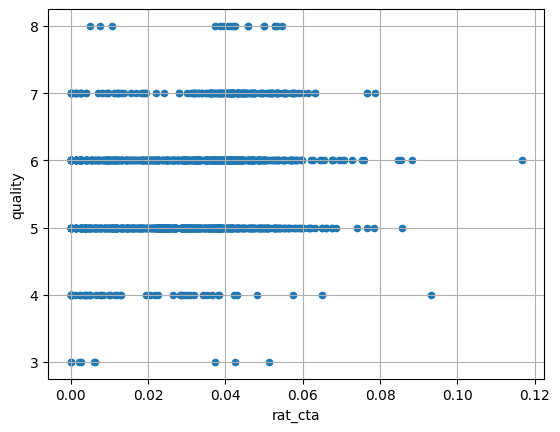

In [11]:
# 산점도

wine.plot(kind='scatter', x='rat_cta', y='quality')
plt.grid()
plt.show()

### **Q12. 데이터 프레임 wine의 컬럼 density와 pH를 표준화(standardization) 하시기 바랍니다**

---

In [12]:
# 컬럼 density와 pH를 표준화(standardization) - 답안 1
x = wine[['density', 'pH']]
wine[['density', 'pH']]= ( x - x.mean(axis=0) ) / x.std(axis=0)  

In [13]:
# 컬럼 density와 pH를 표준화(standardization) - 답안 2
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

wine[['density', 'pH']]=scaler.fit_transform(wine[['density', 'pH']])

In [14]:
# 데이터를 트레이닝셋 / 테스트셋으로 분할
from sklearn.model_selection import train_test_split

x = wine.drop(['quality'], axis=1)
y = wine['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2021, stratify = y)

In [15]:
#  트레이닝 데이터를 트레이닝셋 / 벨리데이션셋으로 분할
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=1/(1+8), random_state=2021, stratify = y_train)

### **Q15. RandomForest 모델들을 학습시키시기 바랍니다.**
* **
- RandomForestClassifier 하이퍼파라미터 설정 :  n_estimators=나무의 개수, max_depth=13(각 Tree의 max depth),min_samples_leaf=5(한개의 node에 최소의 데이터 개수, 5개면 tree depth를 늘리지 않음) random_state=30
- 와인의 퀄리티를 '분류'모델링 한다.
- 트레이닝 셋 (x_train, y_train)을 이용하여 학습시킨다.
- 나무의 개수를 1에서 50까지 늘려가며 학습한다.
- 학습시킨 랜덤포레스트들은 리스트를 만들어 forests 변수에 담아둔다.
- seed나 random_state는 2021로 고정한다.
---

In [16]:
#  RandomForest 모델 - 나무의 개수를 1에서 50까지 늘려가며 학습
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forests = []
for n_trees in range(1, 51) :
    forest = RandomForestClassifier(n_estimators=n_trees, max_depth=13, min_samples_leaf=5, random_state=2021)
    forest.fit(x_train, y_train)
    forests.append(forest)

In [17]:
# RandomForest 모델들의 성능
accs = []
for i in range(50) :
    forest = forests[i]
    acc = forest.score(x_valid, y_valid)
    accs.append(acc)

In [20]:
[0.1+i for i in range(50)]

[0.1,
 1.1,
 2.1,
 3.1,
 4.1,
 5.1,
 6.1,
 7.1,
 8.1,
 9.1,
 10.1,
 11.1,
 12.1,
 13.1,
 14.1,
 15.1,
 16.1,
 17.1,
 18.1,
 19.1,
 20.1,
 21.1,
 22.1,
 23.1,
 24.1,
 25.1,
 26.1,
 27.1,
 28.1,
 29.1,
 30.1,
 31.1,
 32.1,
 33.1,
 34.1,
 35.1,
 36.1,
 37.1,
 38.1,
 39.1,
 40.1,
 41.1,
 42.1,
 43.1,
 44.1,
 45.1,
 46.1,
 47.1,
 48.1,
 49.1]

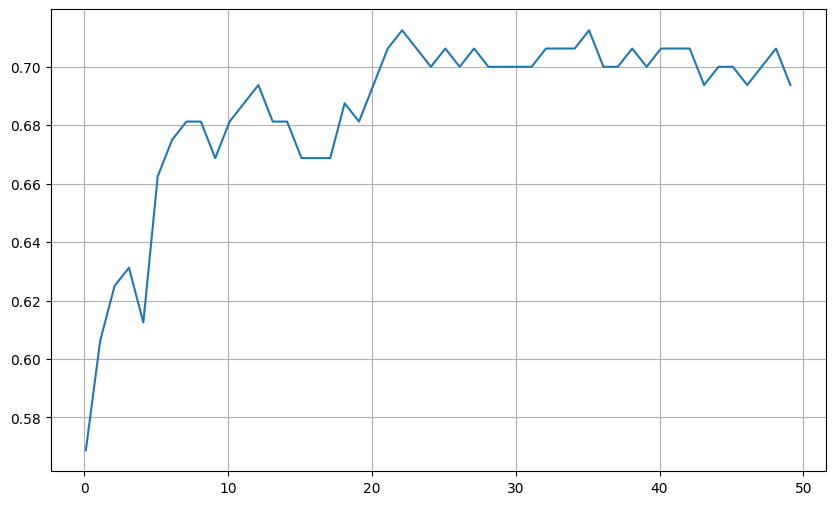

In [22]:
# 성능 시각화
plt.figure(figsize=(10, 6))
plt.plot([0.1+i for i in range(50)], accs)
plt.grid()
plt.show()

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# 딥러닝
keras.backend.clear_session()

model = Sequential()
model.add(Dense(36, activation='relu', input_shape=(14,)))
model.add(BatchNormalization())
model.add(Dense(36, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=2000, batch_size=32,
                    verbose=1,validation_data=(x_valid, y_valid),callbacks=[es])

Epoch 1/2000
40/40 [==============================] - 2s 10ms/step - loss: 2.4992 - accuracy: 0.1673 - val_loss: 2.3004 - val_accuracy: 0.2375
Epoch 2/2000
40/40 [==============================] - 0s 3ms/step - loss: 2.0246 - accuracy: 0.4003 - val_loss: 2.0817 - val_accuracy: 0.3250
Epoch 3/2000
40/40 [==============================] - 0s 3ms/step - loss: 1.8070 - accuracy: 0.4746 - val_loss: 1.9881 - val_accuracy: 0.4313
Epoch 4/2000
40/40 [==============================] - 0s 3ms/step - loss: 1.6178 - accuracy: 0.5012 - val_loss: 1.8903 - val_accuracy: 0.4437
Epoch 5/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.4606 - accuracy: 0.5285 - val_loss: 1.6952 - val_accuracy: 0.4812
Epoch 6/2000
40/40 [==============================] - 0s 3ms/step - loss: 1.3597 - accuracy: 0.5489 - val_loss: 1.5997 - val_accuracy: 0.4563
Epoch 7/2000
40/40 [==============================] - 0s 4ms/step - loss: 1.2450 - accuracy: 0.5559 - val_loss: 1.4842 - val_accuracy: 0.4563
Epoch

40/40 [==============================] - 0s 4ms/step - loss: 0.9024 - accuracy: 0.6020 - val_loss: 0.9144 - val_accuracy: 0.6313
Epoch 59/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.9048 - accuracy: 0.6013 - val_loss: 0.9123 - val_accuracy: 0.6375
Epoch 60/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.9069 - accuracy: 0.6185 - val_loss: 0.9217 - val_accuracy: 0.6500
Epoch 61/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8816 - accuracy: 0.6231 - val_loss: 0.9317 - val_accuracy: 0.6375
Epoch 62/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.9046 - accuracy: 0.6177 - val_loss: 0.9176 - val_accuracy: 0.6562
Epoch 63/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8940 - accuracy: 0.6106 - val_loss: 0.9497 - val_accuracy: 0.5813
Epoch 64/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8824 - accuracy: 0.6286 - val_loss: 0.9341 - val_accuracy: 0.6375
Epoch 65/2000

40/40 [==============================] - 0s 3ms/step - loss: 0.8667 - accuracy: 0.6239 - val_loss: 0.9017 - val_accuracy: 0.6375
Epoch 116/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8618 - accuracy: 0.6192 - val_loss: 0.9031 - val_accuracy: 0.6375
Epoch 117/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8681 - accuracy: 0.6239 - val_loss: 0.9484 - val_accuracy: 0.6375
Epoch 118/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8564 - accuracy: 0.6239 - val_loss: 0.9165 - val_accuracy: 0.6562
Epoch 119/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.8657 - accuracy: 0.6325 - val_loss: 0.8928 - val_accuracy: 0.6438
Epoch 120/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8573 - accuracy: 0.6247 - val_loss: 0.9150 - val_accuracy: 0.6313
Epoch 121/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.8484 - accuracy: 0.6364 - val_loss: 0.9161 - val_accuracy: 0.6687
Epoch 1

Epoch 172/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.8214 - accuracy: 0.6278 - val_loss: 0.9142 - val_accuracy: 0.6625
Epoch 173/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.8114 - accuracy: 0.6521 - val_loss: 0.9316 - val_accuracy: 0.6125
Epoch 174/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8225 - accuracy: 0.6544 - val_loss: 0.9142 - val_accuracy: 0.6000
Epoch 175/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.6396 - val_loss: 0.9197 - val_accuracy: 0.6375
Epoch 176/2000
40/40 [==============================] - 0s 3ms/step - loss: 0.8197 - accuracy: 0.6497 - val_loss: 0.9174 - val_accuracy: 0.6313
Epoch 177/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.8034 - accuracy: 0.6630 - val_loss: 0.9217 - val_accuracy: 0.6438
Epoch 178/2000
40/40 [==============================] - 0s 4ms/step - loss: 0.7927 - accuracy: 0.6661 - val_loss: 0.9348 - val_accuracy:

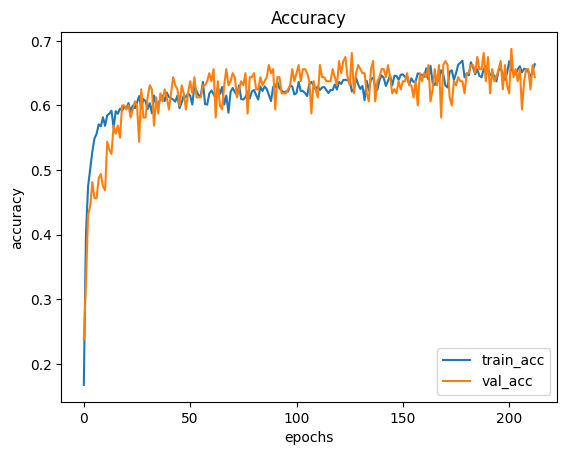

In [26]:
# 여기에 답안코드를 작성하세요
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()